# Transformer based Poetry generator

This very small language model puts forth its soul by generating clumsy poetry, trained on the works of Emily Dickinson

In [1]:
#Load packages
import torch
from mytorch.models.transformer_net import TransNet
from mytorch.data_utils import WordTokenizer, get_poems

# Load Data, Tokenize, and Initialize network

Load in the text data and use a word level tokenizer to encode it. Then define model parameters and initialize the network.

In [2]:
text = get_poems("emily.txt")
print(text[113:324])

device = (
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available()
    else "cpu"
)
print(f'Using device: {device}')

T = 32 #sequence length
tokenizer= WordTokenizer(text, T, device=device)


# Parameters
vocab_dim = tokenizer.vocab_len
embed_dim = 512
nheads = 8
nlayers = 6
nfc= 4*embed_dim
dropout = 0.1
batch_size = 64 



# Initialize model
model = TransNet(vocab_dim, embed_dim, nheads,nlayers, nfc, dropout, device=device)




Her message is committed
To hands I cannot see;
For love of her, sweet countrymen,
Judge tenderly of me!
---
Success is counted sweetest
By those who ne'er succeed.
To comprehend a nectar
Requires sorest need.
Using device: mps


# Train the model

Define parameters for training, the optimizer, and finally, train the model

  0%|          | 0/888 [00:00<?, ?it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

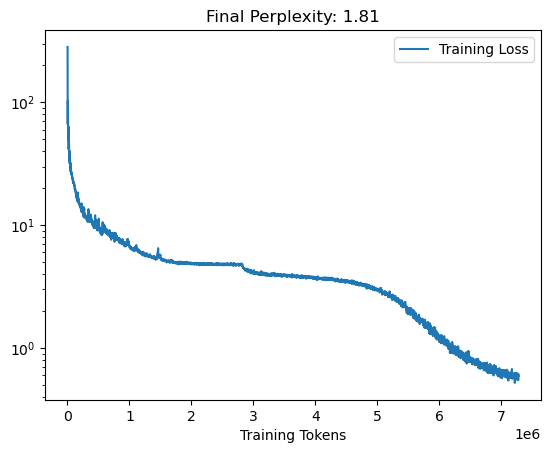

In [3]:
# Parameters 
optimizer = torch.optim.Adam(model.parameters(), lr=8e-4)
epochs = 4

model.train_model(tokenizer, T, batch_size, epochs, optimizer, save="trans_net.pt")

# Generate Text

Include an initial seed prompt, and number of desired tokens to generate. Encode the prompt, pass it to the model, and decode for poetry.

In [11]:
# Input
prompt = "hope is a thing"
num_tokens = 50
enc_prompt = torch.tensor(tokenizer.encode(prompt))
encoded_out = model.generate(enc_prompt, num_tokens,T, device)
decoded = tokenizer.decode(encoded_out)
print(decoded)

hope is a thing;
but by the amiss
lead nature here, --

in broken mathematics
we estimate our our our our our our our our our our our our our
